<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green">Определение закономерностей, определяющих успешность игр</h1>

# Описание проекта
Заказчик- интернет-магазин "Стримчик". Продавец компьютерных игр по всему миру. Цель заказчика - сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Из открытых источников доступны исторические данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Задача исследования - выявить определяющие успешность игры закономерности. 


### Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы долларов)
    EU_sales — продажи в Европе (миллионы долларов)
    JP_sales — продажи в Японии (миллионы долларов)
    Other_sales — продажи в других странах (миллионы долларов)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

*Данные за 2016 год могут быть неполными.

### План действий

1. Знакомство с данными. Изучение общей информации.
2. Предподготовка данных
3. Исследовательский анализ данных
4. Портрет пользователя каждого региона
4. Проверка гипотез
5. Выводы



## Знакомство с данными. Изучение общей информации

In [116]:
import matplotlib.pyplot as plt # выгружаем необходимые библиотеки
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import math as mt
from functools import reduce
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [117]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #изменение глобальной настройки отображения 

In [118]:
games_data = pd.read_csv('/datasets/games.csv') #датасет с объединенными данными по всем играм, годам выпуска,
#жанром, продажам, оценкам и рейтингам

In [119]:
print(games_data.info()) #ниже заменяем названия столбцов (приводим к нижнему регистру)
games_data.set_axis(['name','platform','year_of_release', 'genre', 'na_sales', 'eu_sales', 
                    'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],\
                    axis = 'columns', inplace = True)
print(games_data.head(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                           name platform  year_of_release         genre  \
0                    Wii Sports      Wii         2006.000        Sports   
1             Super Mario Bros.      NES         1985.000      Platform   
2                Mario Kart Wii      Wii         2008.000        Racing   
3             Wii Sports Resort      Wii         2009.000        Sports   
4   

In [120]:
games_data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [121]:
"Пропуски в столбцах year_of_release,name,genre"
games_data['year_of_release'].isnull().sum()/ len(games_data) 
games_data.dropna(subset = ['year_of_release', 'name', 'genre'], inplace = True)

Пропущаные значения в данном столбце может быть связано с ошибкой заполнения, фактическим отсутствием информации. Необходимо сообщить разработчикам о необходимости доработки данных.
Замена пропусков в данном столбце снизит точность. Т.к. общее количество данных не превышает 0.02% от общего объема, удалим строки с пропущенным значением. Так же удали 2 строки с пропусками в жанре и названии. Вероятно, пропуски совпадают в двух одинаковых играх. Без названия и жанра, точность результатов так же снизится.

In [122]:
"Изменение типа данных в 'user_score'"
#Основные столбцы имеют тип данных float. Необходима замена на тип int для дальнейших расчетов. Столбец 
#user_score имеет тип object. Рассмотрим уникальные значения по столбцу, чтобы понять причину такого типа.
print(games_data['user_score'].unique()) #обнаружено значение 'tbd', что означет фактическое отсутствие рейтинга
#- недостаточно оценок.
# Замена на любое значение в рамках рейтинга, будет некорректным. Заменим тип данных на числовой, пропуски, 
#которые добавятся после замены, обработаем отдельно.

games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')
print(games_data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


In [123]:
"Пропуски в столбцах critic_score и user_score"
for column in ['critic_score', 'user_score']:
    games_data[column] =  games_data[column].fillna(value=-1)

Наличие пропусков в данных столбцах могу означать, что игры либо не оценивались критиками и пользователями в принципе, либо эти данные не собраны. Так как объем таких данных значительный, мы не можем откинуть всю строку с другой информацией. 
Для более корректных действий,  я бы запросила дополнительную информацию у разработчиков. Вручную перекрывать пропуски с макисмальной точностью - не целесообразно, относительно целей проекта - спланировать рекламный бюджет, значит, задача срочная.
Заменим пропуски на "-1", в дальнейшем анализе будем принимать эти значения за отстутсвие рейтинга. При подсчете среднего, медианы, дисперсии, будем делать соответствующий срез, чтобы не нарушить точность основных показателей.

In [124]:
"Пропуски в столбце rating"
games_data['year_of_release'].min()
games_data['rating'] = games_data['rating'].fillna(value='Z')
games_data['rating'].unique()

array(['E', 'Z', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В датасете находится информация об играх с 1980г.
Entertainment Software Rating Board (ESRB) была основана в 1994г. (википедия). Так, игры с более ранним выпуском могли не проходить через данный рейтинг. Пропуски в данном столбце для дальнейших расчетов заменим на условное "Z"

In [125]:
games_data.isnull().sum()#проверка изменений

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [126]:
for column in ['year_of_release', 'na_sales', 'eu_sales','jp_sales', 'other_sales', 'user_score',\
               'critic_score']:
    games_data[column] =  np.ceil(games_data[column]).astype('int') 
    #округляем значения и меняем типа на целочисленный

In [127]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null int64
eu_sales           16444 non-null int64
jp_sales           16444 non-null int64
other_sales        16444 non-null int64
critic_score       16444 non-null int64
user_score         16444 non-null int64
rating             16444 non-null object
dtypes: int64(7), object(4)
memory usage: 1.5+ MB


In [128]:
games_data['all_sales'] = games_data['na_sales']+games_data['eu_sales']+games_data['jp_sales']+\
games_data['other_sales']
#выделим новый столбец для общего количества продаж

### Выводы по блоку "знакомство с информацией"


Данные обработаны и готовы к дальнейшему анализу.

## Исследовательский анализ данных

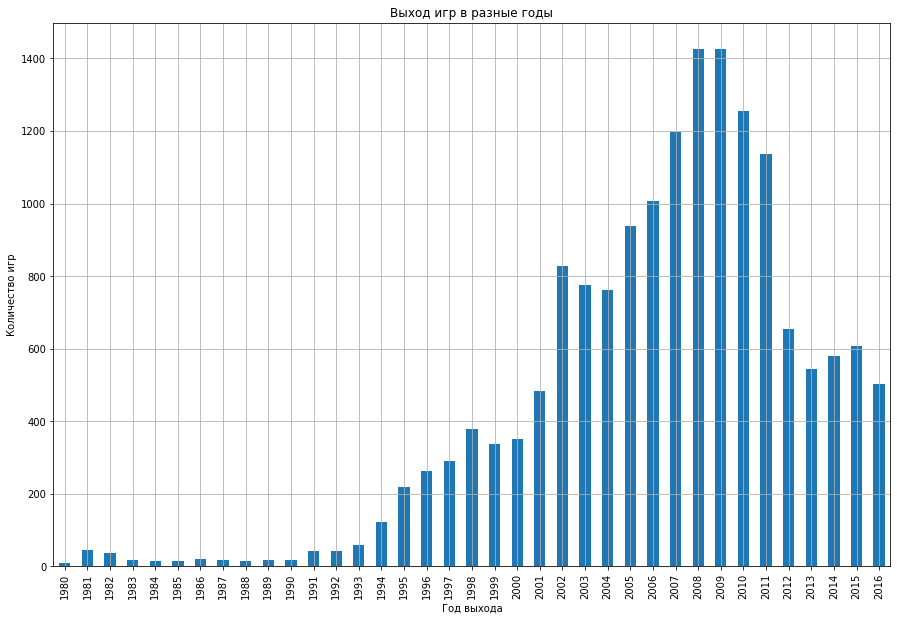

In [129]:
"Выход игр в разные годы"

year_of_release = games_data.groupby('year_of_release')['year_of_release'].count()
year_of_release.plot(figsize=(15,10), x='year_of_release', y='count', title ='Выход игр в разные годы',\
                     kind='bar', grid=True)
plt.xlabel("Год выхода")
plt.ylabel('Количество игр');


До 2009 года, включительно, рынок компьютерных игр набирал обороты. Анализируя с позиции жизненного цикла
продукта, можно сделать вывод, что с 2010 года выпуск компьютерных игр идет на спад. Тем не менее, стоит цчитывать, что в данном исследовании включены все платформы. Так, вероятно в конце 2000х потерял актуальность именно ряд платформ, на которые игры выпускаются реже.

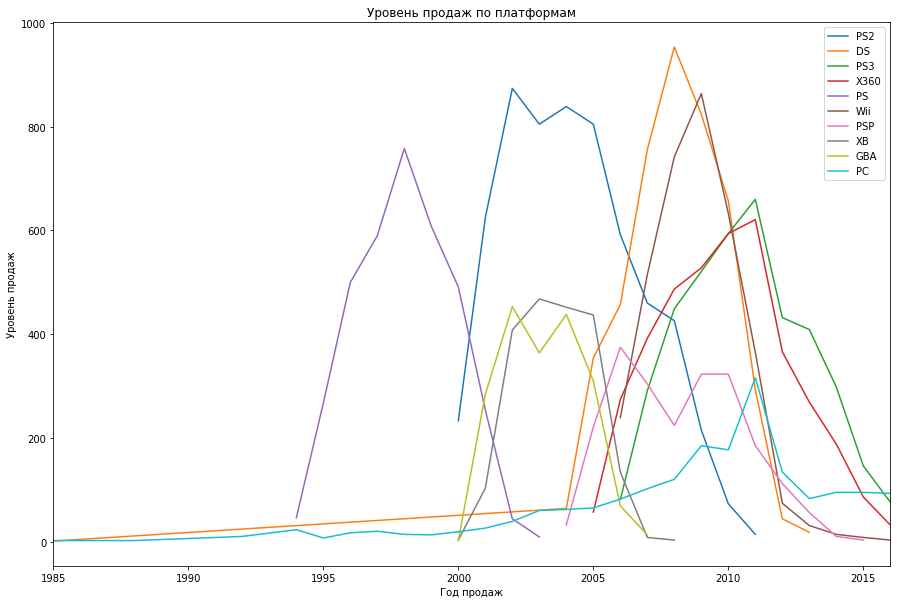

In [130]:
"Продажи по платформам"
top_platform = games_data.groupby('platform')['all_sales'].sum()
#группируем список платформ, находим суммарный объем продаж
top_platform = top_platform.sort_values(ascending = False) # сортируем список по убыванию
top_10_platform_name = ['PS2', 'DS', 'PS3', 'X360', 'PS', 'Wii', 'PSP', 'XB', 'GBA', 'PC'] 
#выводим названия в отдельный список
for name in top_10_platform_name:
    sales = games_data \
    .query('platform == @name') \
    .groupby('year_of_release')['all_sales'] \
    .sum() 
    
    sales.plot(x=sales.index, y = sales.values, figsize=(15,10), title = 'Уровень продаж по платформам',\
               label = name)
plt.xlabel("Год продаж")
plt.ylabel('Уровень продаж')    
plt.legend(prop={'size': 10})
plt.show()


Согласно диаграмме плотности, можно сделать вывод, что срок "жизни" одной платформы - 5-10 лет. К 2011 году перестали выпускать игры для самой высокомаржинальной площадки - PS2. До 2015 закончился выпуск еще 2х масштабных платформ - DS, которая существовала с 80х, наравне с PC, и PSP, которая выпускала игры 10 лет. С 2015 года осталось 4 площадки, которые заявлены в данных и приносят основную прибыль. PC, PS3, X360, Wii. 
Актуальный период для исследования - 2013-2016 гг., как новый этап для игровых платформ. С исключением платформ DS и PSP.

In [131]:
actual_game_data = games_data.query('year_of_release >= 2013 & platform != "PSP" & platform != "DS"') 
# создаю новый датасет с ограничением по дате выпуска игр и платформами, на которые игры не выпускаются.
actual_game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 16 to 16714
Data columns (total 12 columns):
name               2158 non-null object
platform           2158 non-null object
year_of_release    2158 non-null int64
genre              2158 non-null object
na_sales           2158 non-null int64
eu_sales           2158 non-null int64
jp_sales           2158 non-null int64
other_sales        2158 non-null int64
critic_score       2158 non-null int64
user_score         2158 non-null int64
rating             2158 non-null object
all_sales          2158 non-null int64
dtypes: int64(8), object(4)
memory usage: 219.2+ KB


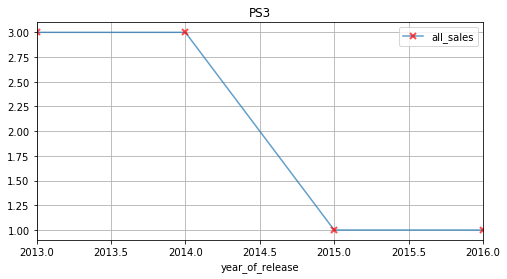

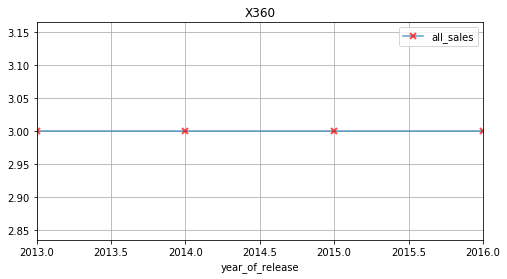

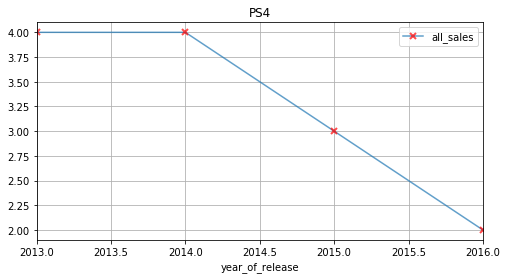

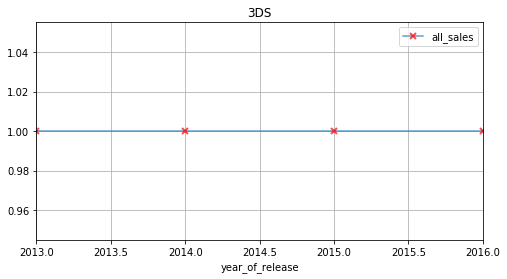

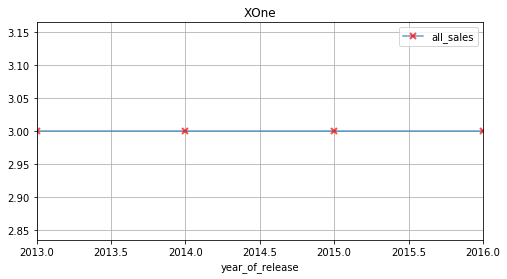

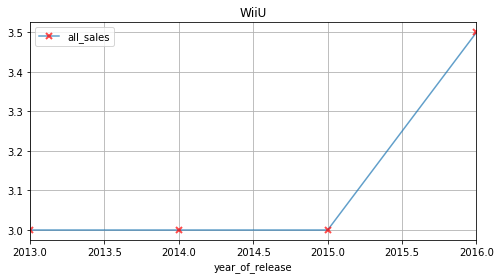

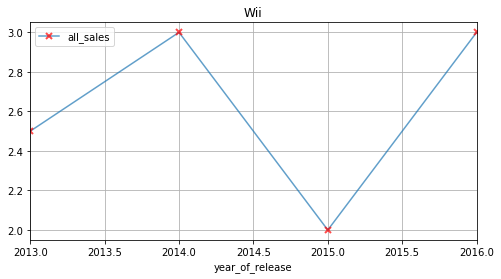

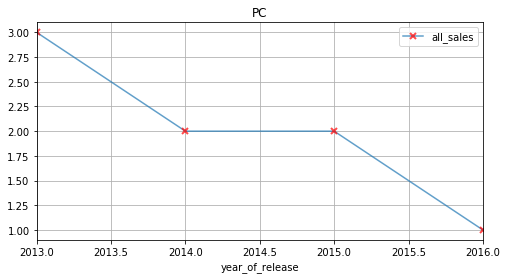

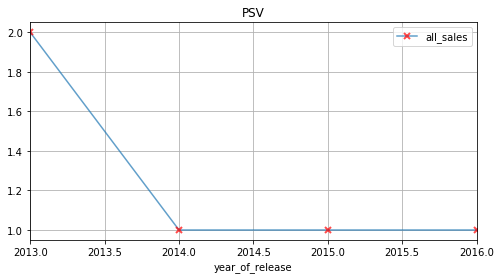

In [132]:
"Лидирующие платормы по продажам"
platforms_name = actual_game_data['platform'].unique()
for names in platforms_name:
    (actual_game_data
    .query('platform == @names')
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='median')
    .plot(style='x-', alpha=0.7, mew=2, mec='r', figsize=(8, 4), title=names, grid=True))
    plt.show()

Лидирующие платформы по продажам за три года: Wii, WiiU, XOne, PS4, X360
Наблюдается рост: WiiU, Wii
Падение: PC, PS4(но уровень выручки пока высокий), PS3
Стагнация, но на высоком уровне: X360, XOne

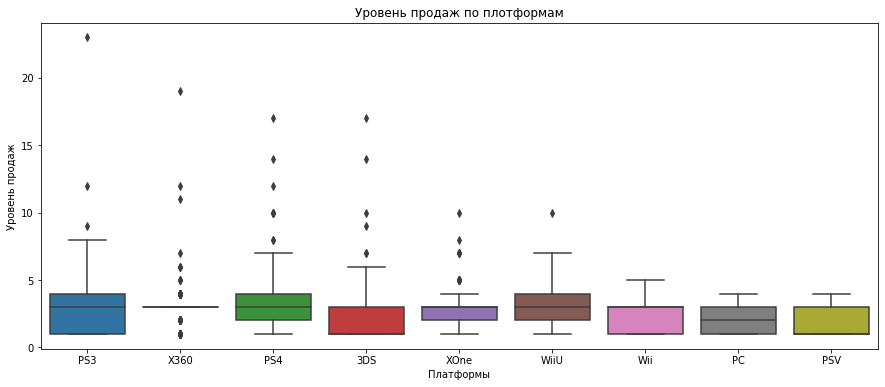

In [133]:
"Диаграммы размаха глобальных и средних продаж по плотформам"
plt.figure(figsize=(15,6))
plt.title('Уровень продаж по плотформам')
ax = sns.boxplot(x="platform", y="all_sales", data=actual_game_data)
plt.ylabel('Уровень продаж')
plt.xlabel('Платформы');

In [134]:
mean_game_data = actual_game_data.groupby('platform', as_index=False)['all_sales'].mean() 
#создаю таблицу с расчетом средних продаж по платформам


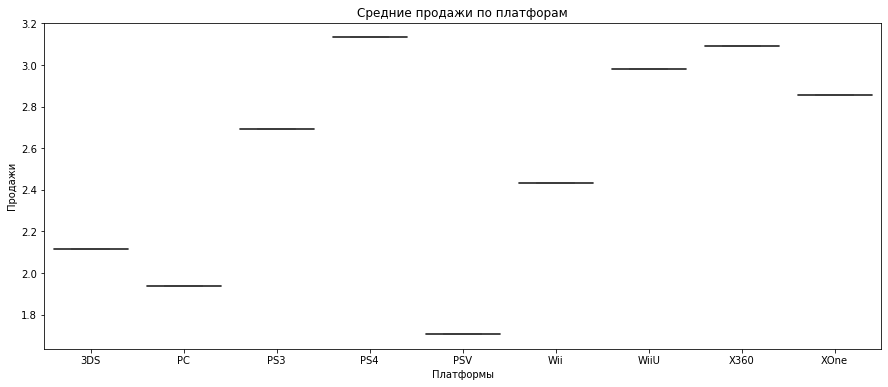

In [135]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x="platform", y="all_sales", data=mean_game_data)
plt.title('Средние продажи по платфорам')
plt.xlabel("Платформы")
plt.ylabel('Продажи');

Диграммы размаха подтверждают, что в глобальных и средних продажах игр по платформам лидируют следующие:Wii, WiiU, XOne, PS4, X360, а так же PS3.

## Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

In [136]:
import os
def get_corr_strength(cor):
    corr_crit = "очень сильная"
    if -0.1 <= cor < 0.1:
        corr_crit = 'отсутствует'
    if 0.1 <= cor < 0.25:
         corr_crit = 'слабая'
    if 0.25 <= cor < 0.5:
        corr_crit = 'умеренная'
    if 0.5 <= cor < 0.75:
        corr_crit = 'сильная'
    if -0.25 <= cor < -0.1:
         corr_crit = 'слабая'
    if -0.5 <= cor < -0.25:
        corr_crit = 'умеренная'
    if -0.75 <= cor < -1:
        corr_crit = 'сильная'    
    return corr_crit    

def corr(data):
    "Принимает датасет, возвращает диаграммы рассеяния, считает уровень корреляции, возвращает вывод"
    data.plot.scatter(x='all_sales', y='critic_score', grid=True, title='Зависимость продаж от оценки критиков')
    data.plot.scatter(x='all_sales', y='user_score', grid=True, title='Зависимость продаж от оценки пользователей')
    
   
    
    cor1 = get_corr_strength(data['all_sales'].corr(data['critic_score']))
    cor_crit = f"Корреляция зависимости продаж от оценки критиков {cor1}"
   
    
    cor2 = get_corr_strength(data['all_sales'].corr(data['user_score']))
    cor_users = f"Корреляция зависимости продаж от оценки пользователей {cor2}"
    
    return cor_crit + '\n' + cor_users
 

In [137]:
PS3_score = actual_game_data.query('platform == "PS3"') #создаю выборки по платформам
Wii_score = actual_game_data.query('platform == "Wii"')
WiiU_score = actual_game_data.query('platform == "WiiU"')
XOne_score = actual_game_data.query('platform == "WiiU"')
PS4_score = actual_game_data.query('platform == "PS4"')
X360_score = actual_game_data.query('platform == "PS4"')

Корреляция зависимости продаж от оценки критиков умеренная
Корреляция зависимости продаж от оценки пользователей умеренная


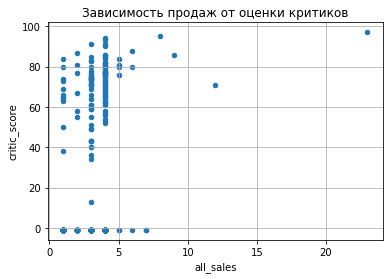

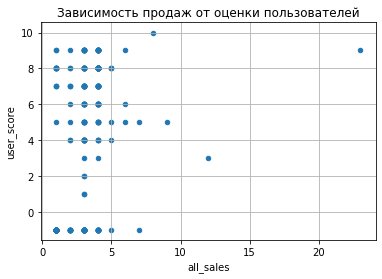

In [138]:
"Зависимость от оценок PS3"
print(corr(PS3_score))

Корреляция зависимости продаж от оценки критиков очень сильная
Корреляция зависимости продаж от оценки пользователей сильная


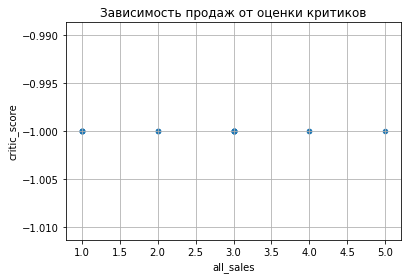

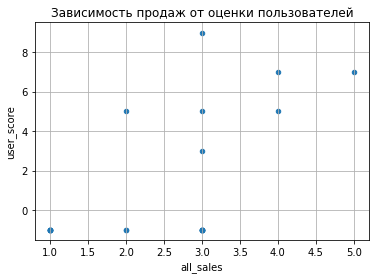

In [139]:
"Зависимость от оценок Wii_score"
print(corr(Wii_score)) 
# Относительно графика, можно сделать вывод, что игры на платформе Wii на оценивались критиками, т.к.
#значения равны -1.

Корреляция зависимости продаж от оценки критиков умеренная
Корреляция зависимости продаж от оценки пользователей умеренная


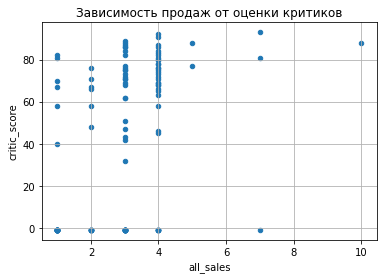

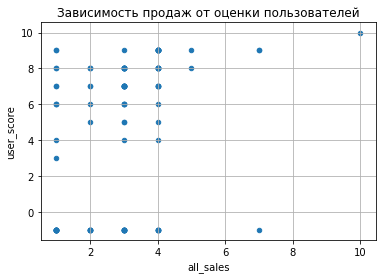

In [140]:
"Зависимость от оценок WiiU"
print(corr(WiiU_score))

Корреляция зависимости продаж от оценки критиков умеренная
Корреляция зависимости продаж от оценки пользователей умеренная


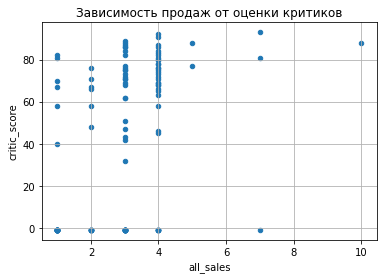

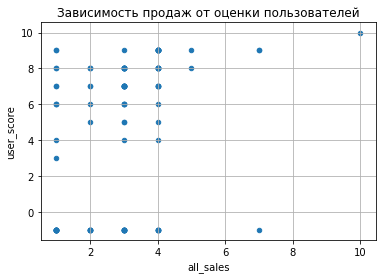

In [141]:
"Зависимость от оценок XOne"
print(corr(XOne_score))

Корреляция зависимости продаж от оценки критиков умеренная
Корреляция зависимости продаж от оценки пользователей слабая


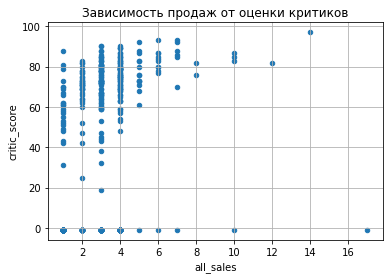

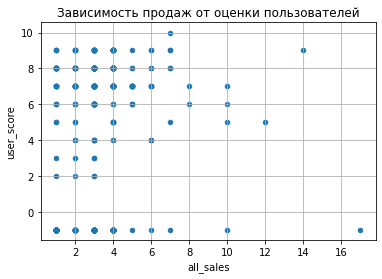

In [142]:
"Зависимость от оценок PS4"
print(corr(PS4_score))

Корреляция зависимости продаж от оценки критиков умеренная
Корреляция зависимости продаж от оценки пользователей слабая


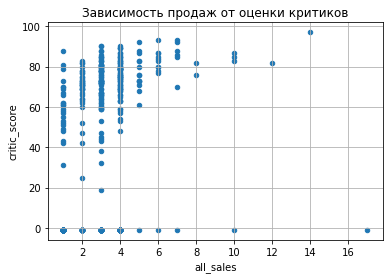

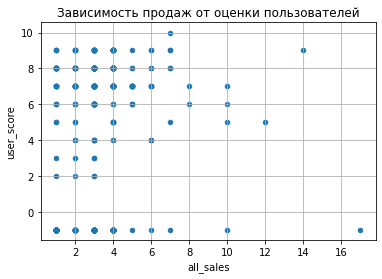

In [143]:
"Зависимость от оценок X360e"
print(corr(X360_score))

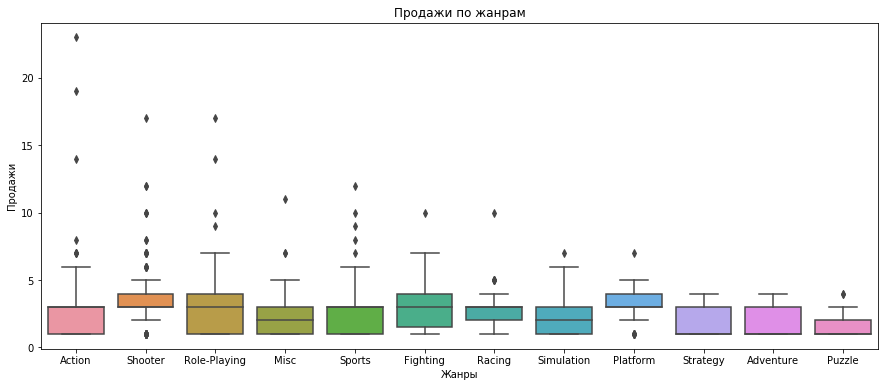

In [144]:
"Диаграммы размаха продаж по жанрам"
plt.figure(figsize=(15,6))
ax = sns.boxplot(x="genre", y="all_sales", data=actual_game_data)
plt.title('Продажи по жанрам')
plt.xlabel("Жанры")
plt.ylabel('Продажи');

### Выводы по блоку "исследовательский анализ данных"

- Жизненный цикл платформы длится от 5 до 10 лет. Самая "долгоживущая" платформа - PC. При этом, под "платформой имеется ввиду "железо. Сама платформа постоянно развивается и имеет, вероятно, самы большой охват аудитории. К 2011 потеряли оборотны основные площадки периоды: PS2, Wii, DS. 
- Лидирующие платформы по продажам Wii, WiiU, XOne, PS4, X360, а так же PS3.
- Зависимости между продажами и оценками критиков/ пользователей не выявлено. Присутствуют площадки, у которых отсутствуют рейтинги, но продажи на высоком уровне.
- Самые популярные жанры: Role playing, Action, Fighting, Simulation. Наименее популярные Puzzle, Racing. 




## Портрет пользователя каждого региона

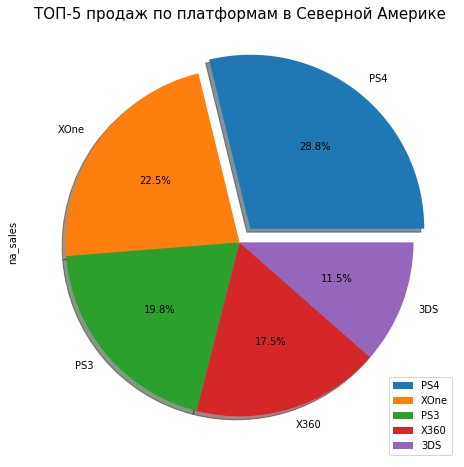

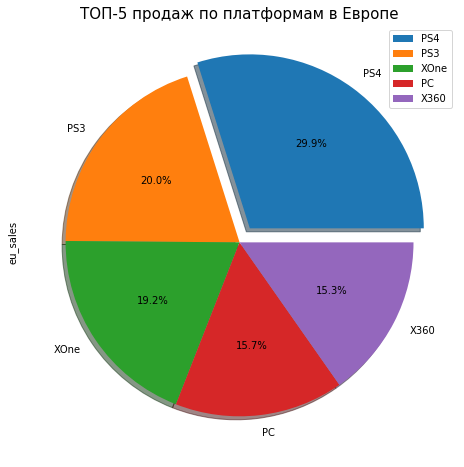

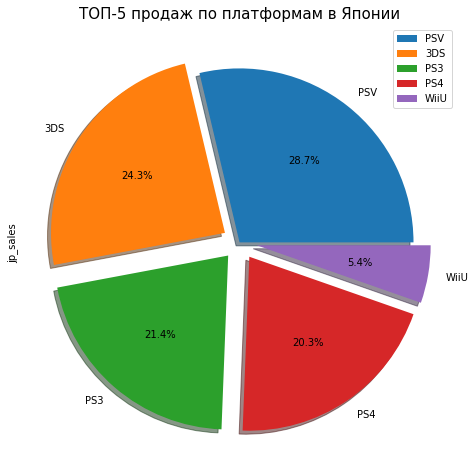

In [145]:
#Строим круговые диаграммы самых популярных платформ по регионам
actual_game_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales',\
                                                                                             ascending=False).\
head(). \
plot.pie(subplots=True,figsize=(20, 8), autopct='%1.1f%%', shadow=True, explode=(0.1, 0, 0, 0, 0))
plt.title('ТОП-5 продаж по платформам в Северной Америке', fontsize=15)
plt.show()

actual_game_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales',\
                                                                                             ascending=False).\
head(). \
plot.pie(subplots=True,figsize=(20, 8), autopct='%1.1f%%', shadow=True, explode=(0.1, 0, 0, 0, 0))
plt.title('ТОП-5 продаж по платформам в Европе', fontsize=15)
plt.show()

actual_game_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales',\
                                                                                             ascending=False).\
head(). \
plot.pie(subplots=True,figsize=(20, 8), autopct='%1.1f%%', shadow=True, explode=(0, 0.1, 0.1, .1, 0.1))
plt.title('ТОП-5 продаж по платформам в Японии', fontsize=15)
plt.show()

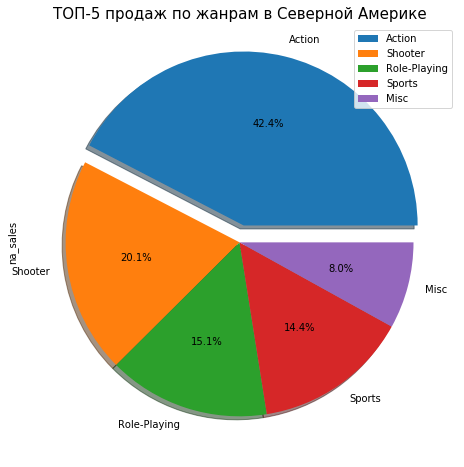

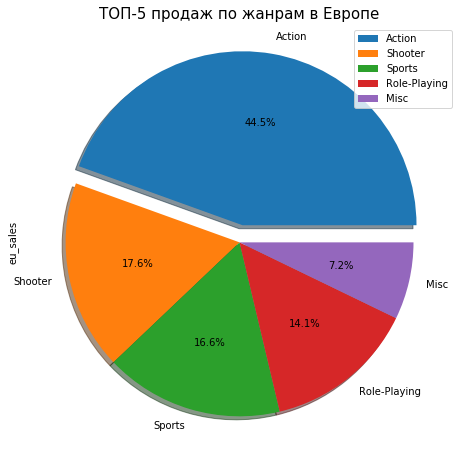

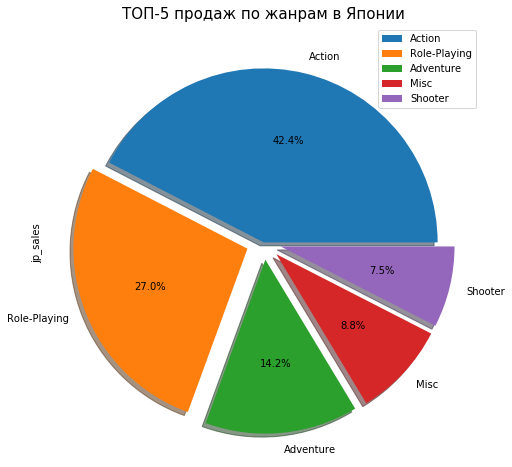

In [146]:
actual_game_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values('na_sales', ascending=False).head(). \
plot.pie(subplots=True,figsize=(20, 8), autopct='%1.1f%%', shadow=True, explode=(0.1, 0, 0, 0, 0))
plt.title('ТОП-5 продаж по жанрам в Северной Америке', fontsize=15)
plt.show()

actual_game_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values('eu_sales', ascending=False).head(). \
plot.pie(subplots=True,figsize=(20, 8), autopct='%1.1f%%', shadow=True, explode=(0.1, 0, 0, 0, 0))
plt.title('ТОП-5 продаж по жанрам в Европе', fontsize=15)
plt.show()

actual_game_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values('jp_sales', ascending=False).head(). \
plot.pie(subplots=True,figsize=(20, 8), autopct='%1.1f%%', shadow=True, explode=(0, 0.1, 0.1, .1, 0.1))
plt.title('ТОП-5 продаж по жанрам в Японии', fontsize=15)
plt.show()

В Северной Америке и Европе ТОП5 в большей стапени совпадает по площадкам. Лидирует PS4, PS3 и Xone. В Европе, так же, предпочитают игры на PC, в то время как в Америке больше продаж приходит на долю 3Ds. ТОП5 Японии значительно отличается. PS4 занимает только 4 позицию по популярности. Лидирует платформа PSV, так же, в ТОП5 попадает 3Ds b  WiiU, которые не отличаются такой популярностью в друх други регионах. 
Такая разница объясняется особенностью вкусовых предпочтений, которыми славится Япония. В Японии лидируют по продажам именно новые площадки. 

Относительно жанров, во всех регионах лидирует Action (от 42 до 44% от общего количества). Основные жанры по популярности совпадают во всех регионах. Role-Playing, Misc, Shooter (наиболее популярен в Америке и Европе, чуть менее популярен в Японии). Однако, стоит отметить, что жанр Sports попадает в ТОП5 Европы и Америки, в то время как в Японии эту позицию ханимает жанр Adventure. 

In [147]:
def rating_age(rating):
    '''Возвращает фактический минимальный возраст'''
    if rating == 'E':
        return 6
    if rating == 'E10+':
        return 10
    if rating == 'T':
        return 13
    if rating == 'M':
        return 17
    if rating == 'Z':
        return 0
actual_game_data['minimal_age'] = actual_game_data['rating'].apply(rating_age)


Зависимость продаж от рейтинга в Северной Америке: 0.3753838551711434
Зависимость продаж от рейтинга в Европе: 0.3753838551711434
Зависимость продаж от рейтинга в Японии: 0.3753838551711434


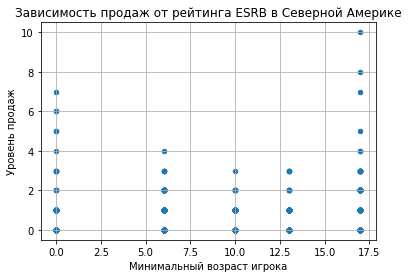

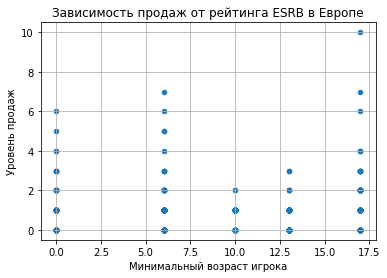

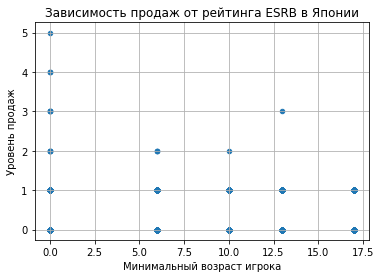

In [148]:
actual_game_data.plot(x='minimal_age', y='na_sales', kind='scatter',\
                      title='Зависимость продаж от рейтинга ESRB в Северной Америке', grid=True)
plt.xlabel("Минимальный возраст игрока")
plt.ylabel('Уровень продаж');
print('Зависимость продаж от рейтинга в Северной Америке:', actual_game_data['na_sales'].\
      corr(actual_game_data['minimal_age']))

actual_game_data.plot(x='minimal_age', y='eu_sales', kind='scatter',\
                      title='Зависимость продаж от рейтинга ESRB в Европе', grid=True)
plt.xlabel("Минимальный возраст игрока")
plt.ylabel('Уровень продаж');
print('Зависимость продаж от рейтинга в Европе:', actual_game_data['na_sales'].\
      corr(actual_game_data['minimal_age']))

actual_game_data.plot(x='minimal_age', y='jp_sales', kind='scatter',\
                      title='Зависимость продаж от рейтинга ESRB в Японии', grid=True)
plt.xlabel("Минимальный возраст игрока")
plt.ylabel('Уровень продаж');
print('Зависимость продаж от рейтинга в Японии:', actual_game_data['na_sales'].\
      corr(actual_game_data['minimal_age']))

Сильной зависимости между продажами и рейтингом ESRB определить не удалось. Большое количество игр не имеет оценки данного рейтинга. Тем не менее, как и в случае с платформами, можно чделать вывод, что показатели Америки и Европе отличаюсч от показателей в Японии. В случае первых двух регионов, основая часть продаж приходится на игры для возраста от 17 лет и игр "для всех" - от 6 лет. В Японии лидируют по продажам игры без рейтинга.

### Вывод по блоку "Портрет полдьзователя каждого региона"

Пользовательский портрет совпадает в Северной Америке и значительно отличается в Японии. При планировании рекламных кампаний, стоит учитывать эти особенности. 

## Проверка гипотез

In [149]:
xone_rating = actual_game_data.query('platform == "XOne"')['user_score'] 
# выделяем таблцы по платформе и рейтигу
pc_rating = actual_game_data.query('platform == "PC"')['user_score']

In [150]:
#Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны
#Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

alpha = 0.03 #критический уровень статистической значимости
#Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, 
#применим метод scipy.stats.ttest_ind 
results = st.ttest_ind(xone_rating, pc_rating) #дисперсии выборок ограничены значениес 10,
#поэтому будем считать, что они равны.
print('p-значение:', results.pvalue)

if (results.pvalue / 2 < alpha):  #так как гипотеза двусторонняя - делим pvalue "в обе стороны"
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.21397226311422135
Не получилось отвергнуть нулевую гипотезу


In [151]:
action_rating = actual_game_data.query('genre == "Action"')['user_score']
sports_rating = actual_game_data.query('genre == "Sports"')['user_score']

In [152]:
#Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.
#Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports отличаются.

alpha = 0.03 #критический уровень статистической значимости
#Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, 
#применим метод scipy.stats.ttest_ind 
results = st.ttest_ind(action_rating, sports_rating) #дисперсии выборок ограничены значениес 10, 
#поэтому будем считать, что они равны.
print('p-значение:', results.pvalue)

if (results.pvalue / 2 < alpha):  #так как гипотеза двусторонняя - делим pvalue "в обе стороны"
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0066738967363899025
Отвергаем нулевую гипотезу


### Вывод по блоку "Проверка гипотез"

Гипотезу о равенстве рейтингов двух площадок не удалось опровергнуть, тем не менее, есть 21% вероятности, что данные могут быть случайными. 
Нипотезу о равнстве рейтингов двух жанров можно отвергуть. Вероятность того, что рейтинги равны крайне мала.

## Общие выводы

В ходе исследования были проведены следующие действия.
- Исследование закономерностей выхода игр на различных платформах. 
- Определен цикл жизни игровой платформы.
- Определен актуальный преиод для аналитики, с целью планирования.
- Найден уровень зависимости рейтингов на продажи игр.
- Рассмотрена прибыльность жанров.
- Определен портрет пользователя разных регионов продаж. 
- Выделены ТОП5 платформ и жанров в регионах.
- Проверены гипотезы о равенстве рейтингов.

Относительно задачи заказчика, можно сделать следующие выводы:
    1. При планировании рекламной кампании, неоходимо ориентироваться на пользовательский рынок относительно геолокации.Так, в Америке и Европе стоит делать акцент  на играх 17+ и 6+  на платформах PS4, PS3 и Xone. На рынок Японии необходимо заложитть большую часть бюджета на платформы PSV, 3DS, WiiU. 
    2. Необходимо выделить определенную часть рекламного бюджета,на платформы, которые будут развиваться, что определенно можно прогнозировать. В особенности, стоит развивать новые платформы в Японии.
    3. Наибольший разброс в прибыли приходится именно на платформы. Поэтому, в первую очередь, 
    стоит ориентироваться на них.
    4. Рекомендуется заранее планировать рекламные кампании для выхода популярных жанров - 
    Role playing, Action, Fighting, Simulation. 
    5. Пользовательский рейтинг и оценки пользователей не имеют весомого влияния на продажи. Вероятно, 
    основное влияние имеет игровая платформа.
    